# 🏠 Predicción del Precio de Viviendas – Análisis y Preprocesamiento de Datos

Este notebook tiene como objetivo construir un modelo de regresión para predecir el precio de viviendas utilizando el dataset proporcionado en [Kaggle - Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset).

A través de un flujo de trabajo estructurado, realizaremos la carga, exploración y preprocesamiento de los datos para preparar un conjunto de entrenamiento adecuado para aplicar modelos de aprendizaje automático.

---


## 🔍 Fase 1: Análisis Exploratorio de Datos (EDA)

###🧾 1.1 Carga del Dataset
En esta primera etapa, cargaremos el conjunto de datos utilizando la biblioteca pandas.



In [125]:
import pandas as pd

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv("Housing.csv")

# Mostrar las primeras filas para revisar la estructura de los datos
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


###🧮 1.2 Información General del Dataset
Con .info() obtenemos un resumen del número de entradas, tipos de datos por columna, y detección preliminar de valores nulos.

In [126]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### 📊 1.3 Estadísticas Descriptivas
Este paso nos permite entender la dispersión de los datos numéricos, detectar posibles outliers y rangos anormales mediante estadísticas como la media, mediana, desviación estándar, etc.

In [127]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


###📉 1.4 Visualización de Distribuciones
Usamos histogramas para visualizar la distribución de las variables numéricas.
Esto nos ayuda a identificar distribuciones sesgadas, colas largas y posibles necesidades de transformación.

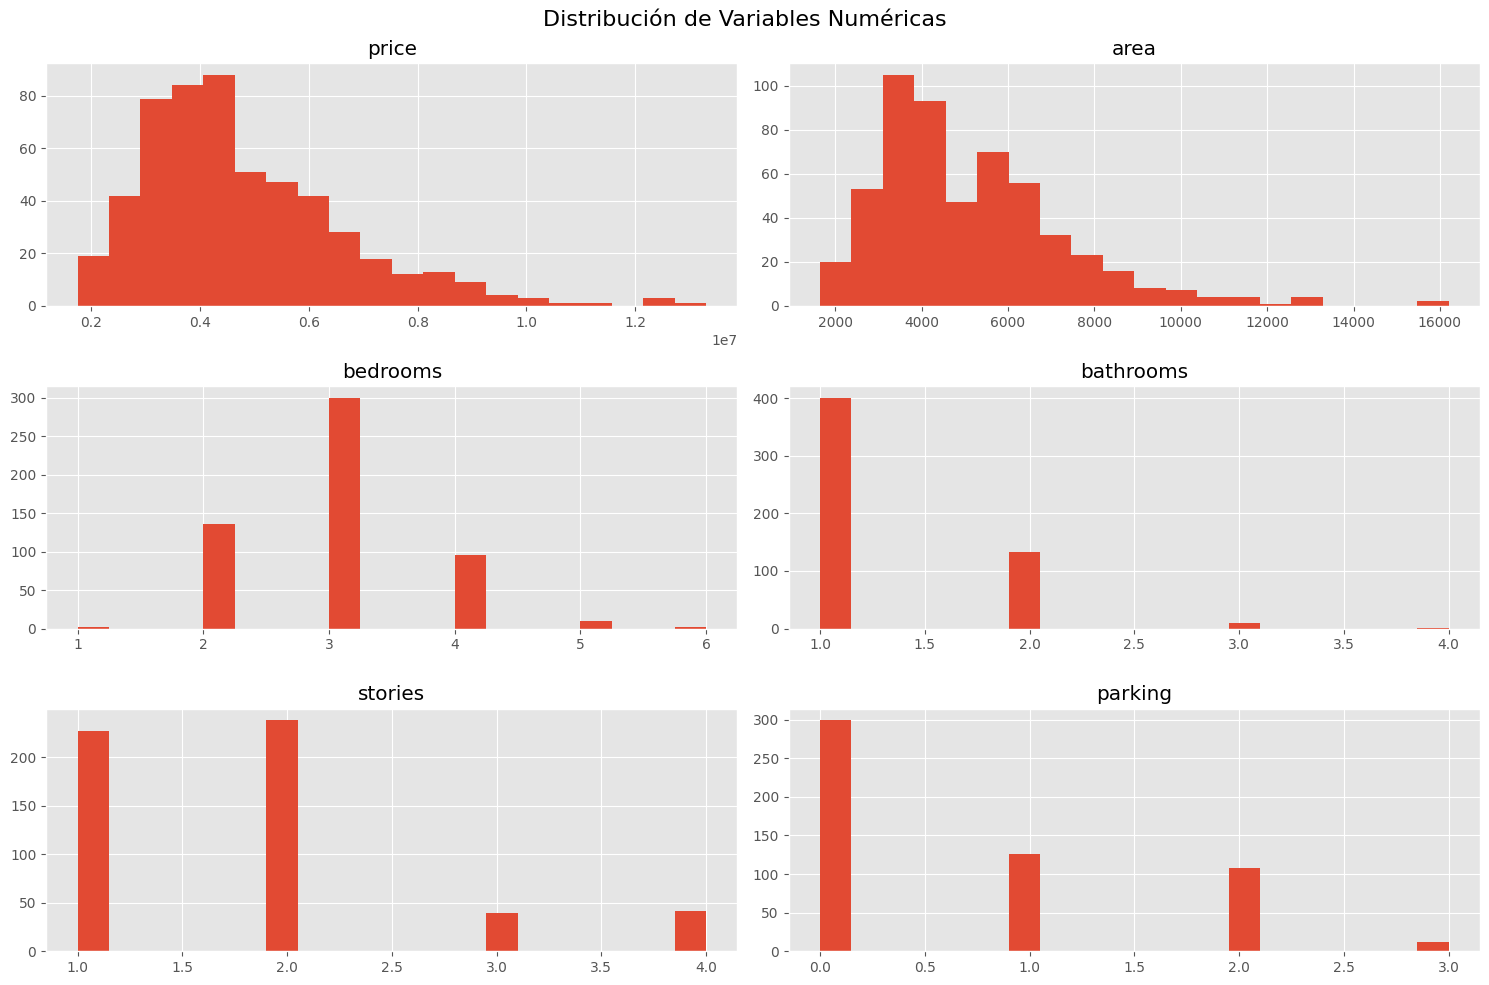

In [128]:
import matplotlib.pyplot as plt

# Configuración de estilo
plt.style.use('ggplot')

# Histograma de todas las variables numéricas
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


### 📦 1.5 Detección de Outliers con Diagramas de Caja
Los boxplots permiten visualizar posibles valores atípicos (outliers) en las variables numéricas.
Esto será útil más adelante para decidir si deben tratarse o eliminarse.

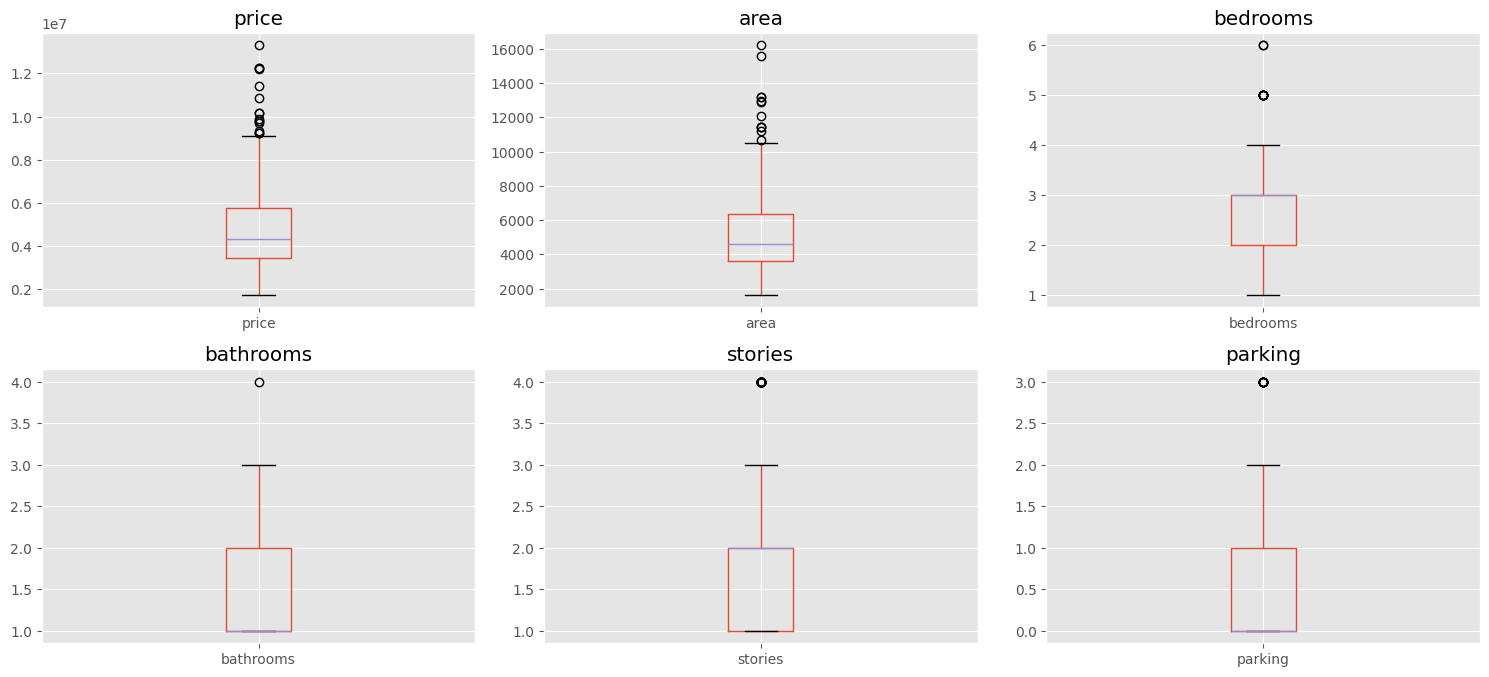

In [129]:
# Boxplots de variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()


###❓ 1.6 Revisión de Valores Nulos
Detectamos si hay columnas con valores nulos y cuántos, para luego decidir cómo imputarlos o tratarlos.

In [130]:
# Cantidad de valores nulos por columna
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


##📈 Fase 2: Análisis de Correlación
###🧩 2.1 Matriz de Correlación
El análisis de correlación nos permite identificar qué variables tienen una relación fuerte (positiva o negativa) con el precio (price).
Esto es clave para seleccionar las características más relevantes para el modelo y eliminar aquellas redundantes.


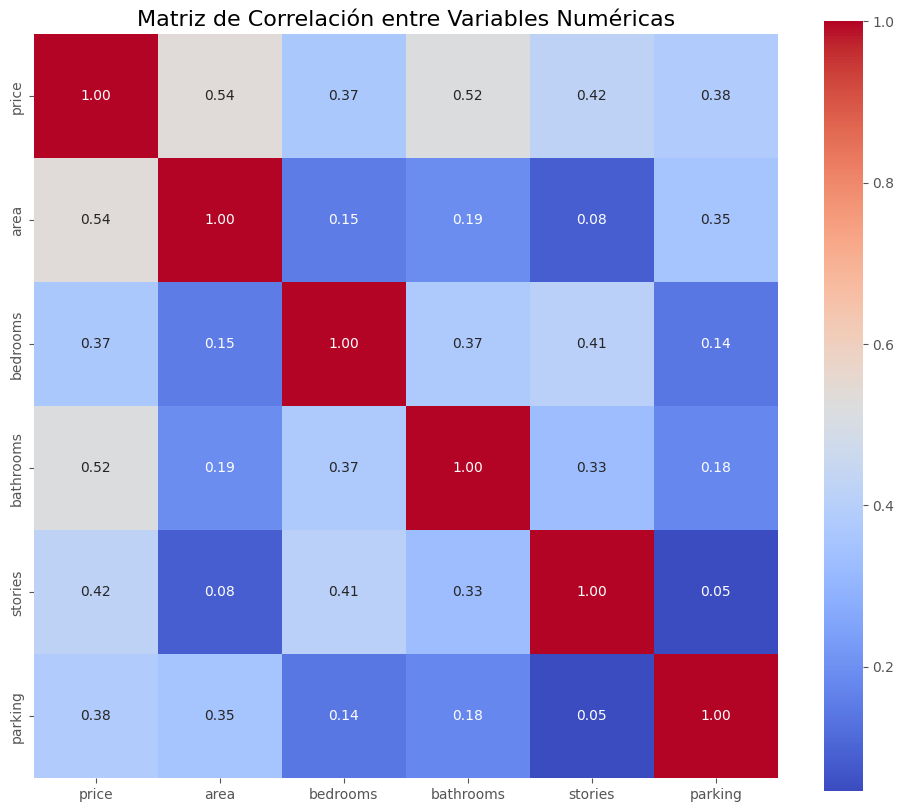

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación para variables numéricas
corr_matrix = df.corr(numeric_only=True)

# Configuración del tamaño y estilo del heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=16)
plt.show()


###🔍 2.2 Filtro de Variables Altamente Correlacionadas con el Precio
Para ayudar en la futura selección de características (feature selection), extraemos aquellas variables que muestran una alta correlación con el precio (price).
El umbral puede ajustarse, pero generalmente se considera significativa una correlación mayor a ±0.5.

In [132]:
# Correlación de todas las variables con 'price', ordenadas de mayor a menor
correlation_with_price = corr_matrix['price'].sort_values(ascending=False)

# Mostramos aquellas variables que tienen una correlación fuerte (absoluta mayor a 0.5)
correlation_with_price[abs(correlation_with_price) > 0.5]


,price
price,1.000000
area,0.535997
bathrooms,0.517545


### 🧹 2.3 Identificación de Variables Redundantes
Si hay variables que tienen entre sí una correlación muy alta (por ejemplo, > 0.9), puede ser conveniente eliminar una de ellas para evitar multicolinealidad en modelos lineales.

In [133]:
import numpy as np

# Visualizamos solo los pares altamente correlacionados (excluyendo la diagonal)
threshold = 0.9
high_corr_pairs = (
    corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))  # elimina la diagonal
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation', 'level_0': 'var1', 'level_1': 'var2'})
)

high_corr_pairs = high_corr_pairs[abs(high_corr_pairs['correlation']) > threshold]

# Mostrar resultados
high_corr_pairs.sort_values(by='correlation', ascending=False)


,var1,var2,correlation


Si esa tabla sale vacía, significa que no hay variables que estén altamente correlacionadas entre sí (r > 0.9 o r < -0.9), lo cual no es malo — significa que no hay riesgo claro de multicolinealidad fuerte en tu dataset.

##🧹 Fase 3: Preprocesamiento de Datos

### 🔄 3.1 Label Encoding

En esta fase, realizamos el **Label Encoding** de las columnas categóricas que contienen valores "yes" y "no". Este paso convierte las variables categóricas en valores numéricos (1 y 0), lo que permite que puedan ser utilizadas en modelos de machine learning.

Las columnas que contienen valores "yes" y "no" en el dataset se transformarán de la siguiente manera:
- `yes` → 1
- `no` → 0

Este proceso se realiza en las siguientes columnas:
- `mainroad`
- `guestroom`
- `basement`
- `hotwaterheating`
- `airconditioning`
- `prefarea`


In [134]:
import pandas as pd

# Visualizamos las primeras filas del dataframe para ver la estructura de los datos
print(df.head())

# Lista de columnas que necesitan Label Encoding
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                  'airconditioning', 'prefarea']

# Aplicamos el Label Encoding (cambio de yes/no a 1/0)
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})

# Convertir a enteros para evitar futuros problemas
df[binary_columns] = df[binary_columns].astype(int)

# Visualizamos el dataframe después de la transformación
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4

<ipython-input-134-77598984e62f>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


### 🔠 3.2 One-Hot Encoding para furnishingstatus

En esta fase, vamos a transformar la columna `furnishingstatus`, que contiene valores categóricos como `furnished`, `semi-furnished` y `unfurnished`, en variables binarias utilizando **One-Hot Encoding**. Este proceso convertirá la columna en múltiples columnas, una para cada categoría, asignando un valor de 1 si la categoría está presente y 0 si no lo está.



In [136]:
# Visualizamos las primeras filas del dataframe para ver la estructura de los datos
print(df.head())

# Realizamos One-Hot Encoding para la columna 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], dtype=int)

# Visualizamos el dataframe después de la transformación
print(df.head())

# Guardamos el DataFrame transformado en un nuevo archivo CSV
df.to_csv("housing_prices_cleaned.csv", index=False)


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  
      price  area  bedrooms  bat

#### Extraer datos para probar el modelo
Seleccionar el `10%` de los datos: Para esto, puedes usar la función `sample()` de pandas para obtener un subconjunto aleatorio del `10%` de los datos.

In [137]:
# Seleccionar el 10% de los datos aleatoriamente
df_sample = df.sample(frac=0.1, random_state=None)

# Guardar ese 10% en un nuevo archivo CSV
df_sample.to_csv('data_test.csv', index=False)

# Eliminar ese 10% de los datos del DataFrame original
df = df.drop(df_sample.index)
df.count()

,0
price,491
area,491
bedrooms,491
bathrooms,491
stories,491
mainroad,491
guestroom,491
basement,491
hotwaterheating,491
airconditioning,491


### 🧪 3.4 Generación basada en ruido + pequeñas perturbaciones
Tomas muestras reales y les agregas un pequeño ruido aleatorio para generar variaciones creíbles:

In [138]:
import pandas as pd
import numpy as np

def generar_datos_sinteticos(df, n, noise_level=0.05):
    df_synth = df.copy()

    # Seleccionamos columnas numéricas (puedes ajustar esto según necesidad)
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Creamos n muestras aleatorias del dataset original
    df_sample = df.sample(n=n, replace=True).reset_index(drop=True)

    # Agregamos ruido
    for col in numeric_cols:
        std = df[col].std()
        noise = np.random.normal(0, noise_level * std, size=n)
        df_sample[col] += noise

    # Aseguramos que los enteros no pierdan su tipo
    for col in df.columns:
        if 'int' in str(df[col].dtype):
            df_sample[col] = df_sample[col].round().astype(int)

    return df_sample

df_sintetico = generar_datos_sinteticos(df, n=1500)
df = pd.concat([df, df_sintetico], ignore_index=True)
df.count()

,0
price,1991
area,1991
bedrooms,1991
bathrooms,1991
stories,1991
mainroad,1991
guestroom,1991
basement,1991
hotwaterheating,1991
airconditioning,1991


### 🧠 3.3 Nuevas características derivadas
1. Relaciones entre variables existentes: Estas ayudan a capturar proporciones o eficiencia del uso del espacio.

In [139]:
# Área por habitación (densidad)
df['area_per_room'] = df['area'] / (df['bedrooms'] + df['bathrooms'])

# Baños por dormitorio
df['bath_per_bed'] = df['bathrooms'] / df['bedrooms']

# Área por piso (stories)
df['area_per_story'] = df['area'] / df['stories']

# Espacio por estacionamiento
df['area_per_parking'] = df['area'] / (df['parking'] + 1)  # +1 para evitar división por cero

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_per_room,bath_per_bed,area_per_story,area_per_parking
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,1236.666667,0.500000,2473.333333,2473.333333
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,1120.000000,1.000000,2240.000000,2240.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,1992.000000,0.666667,4980.000000,3320.000000
3,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,1484.000000,0.250000,3710.000000,2473.333333
4,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0,1225.714286,0.750000,2145.000000,2860.000000


2. Conteo de características "**premium**"
Sumar los binarios para ver cuántas cosas buenas tiene la casa.


In [140]:
df['total_amenities'] = (
    df['mainroad'] +
    df['guestroom'] +
    df['basement'] +
    df['hotwaterheating'] +
    df['airconditioning'] +
    df['prefarea']
)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area_per_room,bath_per_bed,area_per_story,area_per_parking,total_amenities
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,1236.666667,0.500000,2473.333333,2473.333333,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,1120.000000,1.000000,2240.000000,2240.000000,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,1992.000000,0.666667,4980.000000,3320.000000,3
3,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,1484.000000,0.250000,3710.000000,2473.333333,4
4,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0,1225.714286,0.750000,2145.000000,2860.000000,3


Comprobamos como quedo creado el nuevo dataframe

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            1991 non-null   int64  
 1   area                             1991 non-null   int64  
 2   bedrooms                         1991 non-null   int64  
 3   bathrooms                        1991 non-null   int64  
 4   stories                          1991 non-null   int64  
 5   mainroad                         1991 non-null   int64  
 6   guestroom                        1991 non-null   int64  
 7   basement                         1991 non-null   int64  
 8   hotwaterheating                  1991 non-null   int64  
 9   airconditioning                  1991 non-null   int64  
 10  parking                          1991 non-null   int64  
 11  prefarea                         1991 non-null   int64  
 12  furnishingstatus_fur

### ⚖️ 3.3 Normalización de Variables Numéricas
En esta fase, normalizamos las variables numéricas del dataset utilizando técnicas de escalado como `StandardScaler`, `MinMaxScaler` y **`RobustScaler`**. Este último se seleccionó debido a su capacidad para ser más resistente a los *outliers* al usar la mediana y el rango intercuartílico en lugar de la media y desviación estándar, lo que lo hace especialmente útil cuando los datos contienen valores extremos que podrían afectar el rendimiento de los modelos de Machine Learning.


In [142]:
# Definimos variables independientes (X) y dependiente (y)
X = df.drop(['price'],  axis=1)
y = df['price']


In [143]:
import joblib
import numpy as np
from sklearn.preprocessing import RobustScaler

# Inicializamos el scaler para y
scaler_y = RobustScaler()

# Aplicamos RobustScaler a la variable dependiente
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Guardamos el scaler de y
joblib.dump(scaler_y, 'robust_scaler_y.joblib')

# Aplicamos RobustScaler a la variable independiente0
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X)

# Guardamos el scaler de X
joblib.dump(scaler_X, 'robust_scaler_X.joblib')

['robust_scaler_X.joblib']

In [144]:
X = pd.DataFrame(X_scaled, columns=X.columns)
y = pd.Series(y_scaled.flatten())

print(X.head())
print(y.head())

       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  0.969771       1.0        1.0      1.0       0.0        0.0       0.0   
1  1.507950       1.0        3.0      2.0       0.0        0.0       0.0   
2  1.857417       0.0        1.0      0.0       0.0        0.0       1.0   
3  0.969771       1.0        0.0      0.0       0.0        1.0       1.0   
4  1.375153       1.0        2.0      2.0       0.0        0.0       0.0   

   hotwaterheating  airconditioning  parking  prefarea  \
0              0.0              1.0      2.0       1.0   
1              0.0              1.0      3.0       0.0   
2              0.0              0.0      2.0       1.0   
3              0.0              1.0      2.0       0.0   
4              0.0              1.0      2.0       1.0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                         1.0                              0.0   
1                         1.0                              0.0

##🔀 Fase 4: División del Dataset en Conjuntos de Entrenamiento y Prueba
Antes de entrenar un modelo, es necesario dividir el conjunto de datos en dos partes:

- Conjunto de entrenamiento (Train): Se utiliza para entrenar el modelo.

- Conjunto de prueba (Test): Se utiliza para evaluar el desempeño del modelo con datos nunca antes vistos.

Una práctica común es reservar el 20% de los datos para prueba y usar el 80% restante para entrenamiento. Esta separación permite medir si el modelo tiene buen poder de generalización.

In [145]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##🚀 Fase 5: Exportación de Archivos Preparados para Entrenamiento
Una vez que los datos han sido limpiados y preprocesados, la siguiente fase consiste en exportar los archivos necesarios para proceder con el entrenamiento del modelo. Esto incluye guardar el dataframe transformado en un archivo CSV que luego se podrá cargar y utilizar en un nuevo notebook o script de entrenamiento.



In [146]:
# Exportamos los conjuntos de datos de entrenamiento y prueba
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Verificamos que los archivos se hayan guardado correctamente
print("Archivos exportados: X_train.csv, X_test.csv, y_train.csv, y_test.csv")


Archivos exportados: X_train.csv, X_test.csv, y_train.csv, y_test.csv


#📝 Conclusión Final
En este notebook, hemos realizado el preprocesamiento del conjunto de datos para la predicción de precios de viviendas. Esto incluyó la carga de los datos, exploración inicial, manejo de valores faltantes, codificación de variables categóricas y normalización de las variables numéricas. Finalmente, se dividieron los datos en conjuntos de entrenamiento y prueba, y exportaron los archivos necesarios para el posterior entrenamiento del modelo.

Con los datos preparados y listos, el siguiente paso será entrenar el modelo para predecir los precios de las viviendas.